# Pymaceuticals Inc.
---

### Analysis

- The data is related to the study the efficiency of different drug regimens in reducing tumor volume.
- Overall, the data suggests that Capomulin and Ramicane are the most effective drug regimens in reducing tumor volume in the study, based on their low mean and median tumor volumes, low tumor volume variance, and low standard deviation and standard error of the mean.
- Percenatge of male and female mouse is almosty equal with 1% perecnt difference which is negligible.
- The regression and correlation for Capomulin shows there is a  positive correlation between mouse weight and the average tumor volume in the study, with a correlation coefficient of 0.84. This means that as mouse weight increases, the average tumor volume tends to increase as well.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# %matplotlib notebook
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID")

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.

Total_mice = mouse_study_data["Mouse ID"].nunique()
Total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dups_data = mouse_study_data.loc[mouse_study_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
dups_data

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

dups_data_id = mouse_study_data.loc[mouse_study_data["Mouse ID"] == dups_data[0]]
dups_data_id



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_DataFrame = mouse_study_data[mouse_study_data["Mouse ID"].isin(dups_data)==False]
clean_DataFrame
clean_DataFrame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
Total_clean_mice = clean_DataFrame["Mouse ID"].nunique()
Total_clean_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_data = clean_DataFrame.groupby("Drug Regimen")

mean = drug_regimen_data["Tumor Volume (mm3)"].mean()
median = drug_regimen_data["Tumor Volume (mm3)"].median()
variance = drug_regimen_data["Tumor Volume (mm3)"].var()
std =drug_regimen_data["Tumor Volume (mm3)"].std()
sem = drug_regimen_data["Tumor Volume (mm3)"].sem()

summary_statstical_df = pd.DataFrame({"Mean Tumor Volume" : mean,
                                     "Median Tumor Volume": median,
                                     "Tumor Volume Variance" : variance,
                                     "Tumor Volume Std. Dev." : std,
                                     "Tumor Volume Std. Err.": sem})
summary_statstical_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_agg_df = drug_regimen_data["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_agg_df 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of observed Mouse Timepoints')

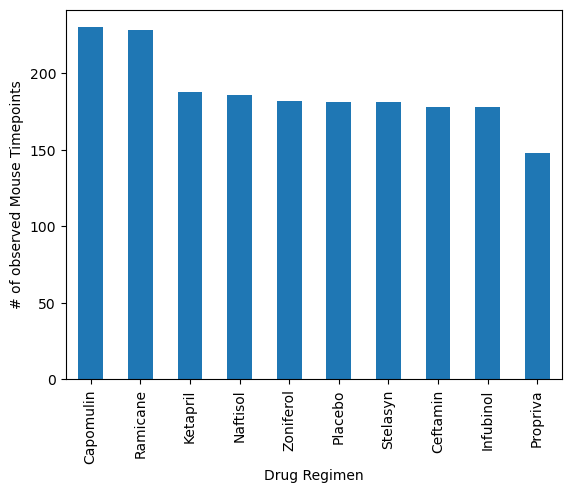

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
mouse_count_per_drug = clean_DataFrame.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)
mouse_chart = mouse_count_per_drug.plot.bar()

mouse_chart.set_xlabel("Drug Regimen")
mouse_chart.set_ylabel("# of observed Mouse Timepoints")

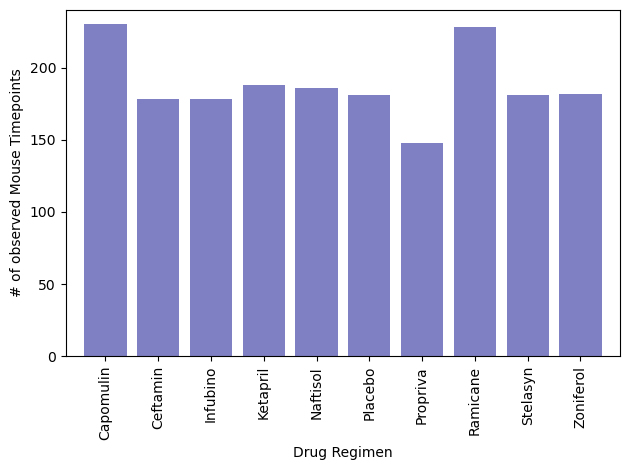

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

Drug_list=["Capomulin","Ceftamin","Infubino","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
mice_list =(clean_DataFrame.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = np.arange(len(mice_list))

plt.bar(x_axis,mice_list,color="darkblue",alpha=0.5,align="center",)
tick_location =[value for value in x_axis]
plt.xticks(tick_location,Drug_list,rotation="vertical")
plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0, max(mice_list)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Sex'>

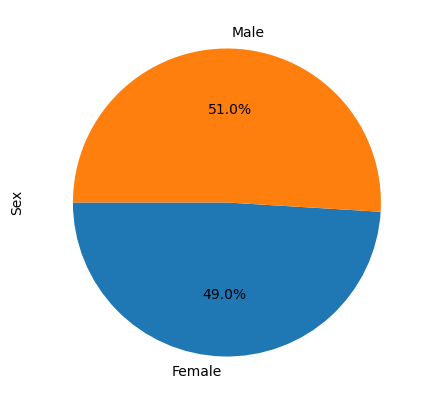

In [15]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_DataFrame.groupby('Sex')['Sex'].count()

mouse_gender.plot.pie(y='Total Count', startangle=180,figsize=(5,5), autopct="%1.01f%%")



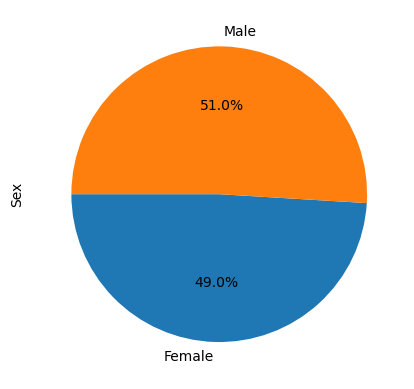

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender = clean_DataFrame.groupby('Sex')['Sex'].count()


plt.pie(mouse_gender,labels=mouse_gender.index, autopct='%.01f%%', startangle=180)

plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
tumor_vol_final=clean_DataFrame.groupby(["Drug Regimen","Mouse ID"]).last()[["Timepoint","Tumor Volume (mm3)"]]
tumor_final_df=tumor_vol_final.reset_index()
tumor_final_df


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_final=tumor_final_df.loc[tumor_final_df["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append( tumor_vol_final)
    
# add subset 
      
    quartiles = tumor_vol_final.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)  
    
# # Determine outliers using upper and lower bounds
    outliers = tumor_vol_final.loc[(tumor_vol_final < lower_bound) 
                  | (tumor_vol_final > upper_bound)]
   
    print(f"{treatment}'s: Potential outliers: {outliers}")

Capomulin's: Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's: Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's: Potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's: Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


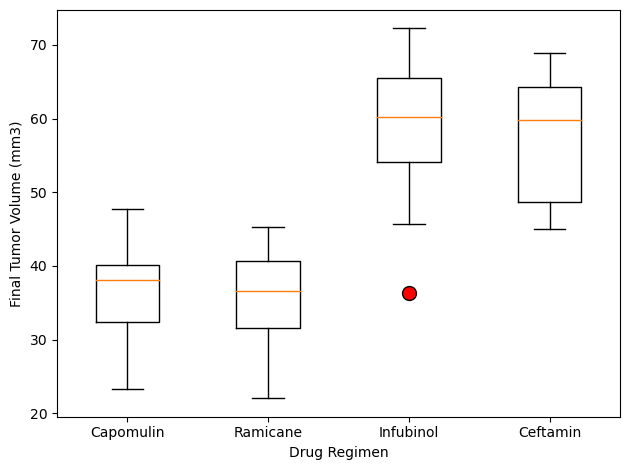

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
figure, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(tumor_vol_data, labels=treatments, flierprops={'markerfacecolor':'r','markersize': 10})

# Set x and y label.
final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')

# Save box plot graph to Images folder
plt.tight_layout()

# Present the box plot chart
plt.show()


## Line and Scatter Plots

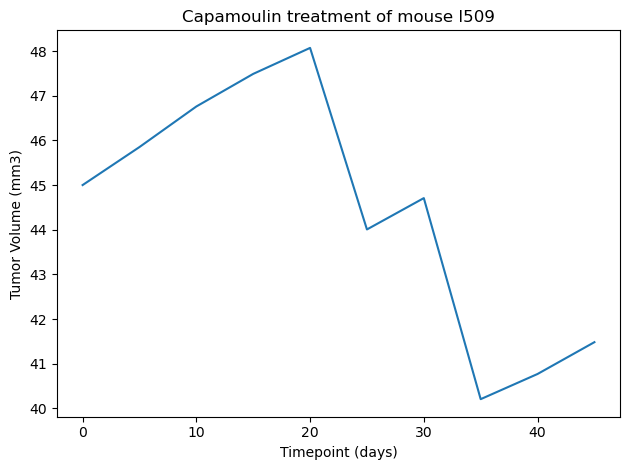

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_DataFrame.loc[clean_DataFrame['Drug Regimen'] == 'Capomulin']

# Identify specific mouse ID and get data of the mouse id
mouse_id = 'l509'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])

# Set axis labels and title
plt.title(f"Capamoulin treatment of mouse {mouse_id}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.tight_layout()

# Show the plot
plt.show()

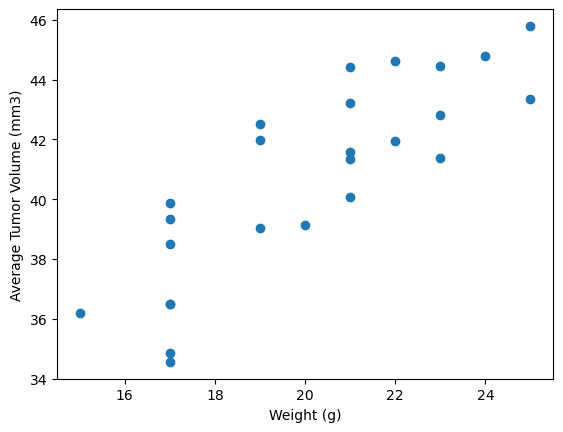

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_gp = capomulin_df.groupby('Mouse ID').mean()
mouse_weight_avg = capomulin_gp['Weight (g)']
mouse_tumor_avg = capomulin_gp['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(mouse_weight_avg, mouse_tumor_avg)

# Set axis label
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


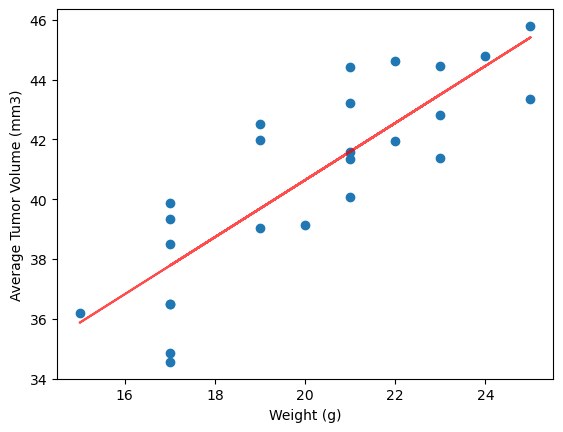

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Define axis values
x_axis_values = mouse_weight_avg
y_axis_values = mouse_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_axis_values, y_axis_values)[0],2)

print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_values, y_axis_values)


# y = mx + c
regress_values = x_axis_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

r_squared = round(rvalue**2,2)

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_axis_values,y_axis_values)
plt.plot(x_axis_values,regress_values, color='r', alpha=0.7)


# Define x and y labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Present the regression plot.
plt.show()
